Importing the libaries

In [163]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import ExtraTreesClassifier

In [164]:
f_data = pd.read_excel(r'C:\Users\S.MIRTHIKA\Documents\SD03Q07\fruits.xlsx',header=0)
print (data)

    fruit_label fruit_name  mass  width  height  color_score
0             1      apple   192    8.4     7.3         0.55
1             1      apple   180    8.0     6.8         0.59
2             1      apple   176    7.4     7.2         0.60
3             2   mandarin    86    6.2     4.7         0.80
4             2   mandarin    84    6.0     4.6         0.79
5             2   mandarin    80    5.8     4.3         0.77
6             2   mandarin    80    5.9     4.3         0.81
7             2   mandarin    76    5.8     4.0         0.81
8             1      apple   178    7.1     7.8         0.92
9             1      apple   172    7.4     7.0         0.89
10            1      apple   166    6.9     7.3         0.93
11            1      apple   172    7.1     7.6         0.92
12            1      apple   154    7.0     7.1         0.88
13            1      apple   164    7.3     7.7         0.70
14            1      apple   152    7.6     7.3         0.69
15            1      app

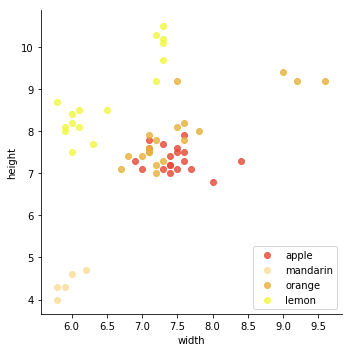

In [165]:
sns.lmplot(x="width",y="height",data=f_data,fit_reg=False,hue='fruit_name',legend=False,palette=dict(apple="#e84938",mandarin="#fcdd97",orange="#e8b038",lemon="#f1f740"))
plt.legend(loc='lower right')
plt.show()

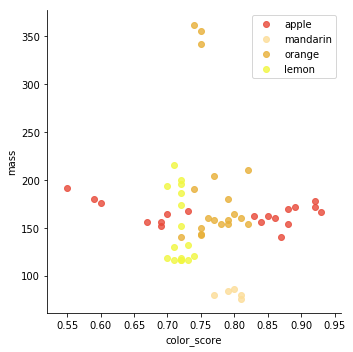

In [166]:
sns.lmplot(x="color_score",y="mass",data=f_data,fit_reg=False,hue='fruit_name',legend=False,palette=dict(apple="#e84938",mandarin="#fcdd97",orange="#e8b038",lemon="#f1f740"))
plt.legend(loc='upper right')
plt.show()

In [167]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

drop_cols=['fruit_name','fruit_label']
X = f_data.drop(drop_cols, axis = 1) 
y = f_data['fruit_name'] 

best_features = SelectKBest(score_func=f_classif, k=4)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  
print(feature_scores.nlargest(4,'Score')) 

df_univ_feat = feature_scores.nlargest(4,'Score')
df_univ_feat.to_csv('feature_selection_UNIVARIATE.csv', index=False)

  Feature_Name      Score
2       height  53.453630
1        width  17.074845
0         mass   8.198281
3  color_score   2.916698


[0.27692447 0.39195489 0.33112064]


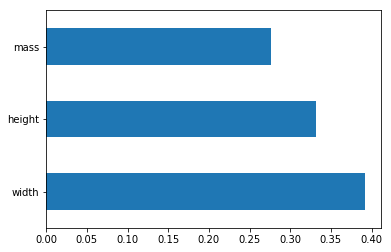

In [168]:
X = data.iloc[:,2:5] 
y = data.iloc[:,1]   

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

In [187]:
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:,2:4] 
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def minkowski_distance(a, b, p=2):
    
    dim = len(a)
    
    distance = 0
    d=1
   
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    
    from collections import Counter
    
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        counter = Counter(y_train[df_nn.index])

        prediction = counter.most_common()[0][0]
        
        y_hat_test.append(prediction)
        
    return y_hat_test


y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=4, p=1)

print(y_hat_test)

[4L, 1L, 1L, 4L, 3L, 3L, 1L, 3L, 4L, 4L, 3L, 1L, 1L, 3L, 4L, 1L, 3L, 3L]


C:\Users\S.MIRTHIKA\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [188]:

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))

0.6666666666666666


In [198]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4, p=1)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
result=accuracy_score(y_test, y_pred_test)
print(result)

0.6666666666666666


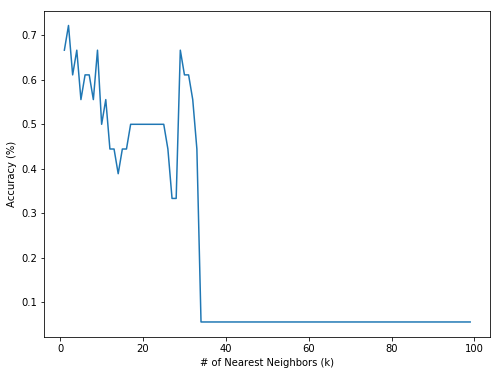

In [199]:
accuracies = []

for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_test))


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');